# Analise exploratoria dos dados de vendas da DataLog

O período analisado foi Jan/23 até Nov/24

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
# Carrega o conjunto de dados gerado artificialmente, caso ele não exite será necessio rodar o arquivo gerar_dados.py
df = pd.read_csv("output/dados_vendas.csv",  parse_dates=["Data"])

In [41]:
df.head()

,Data,Vendas
0,2023-01-01,195.000000
1,2023-01-08,211.008384
2,2023-01-15,186.006489
3,2023-01-22,206.984138
4,2023-01-29,219.931366


In [ ]:
# Estamos setando a data como índice do DataFrame e ordenando por ela
df.set_index("Data", inplace=True)
df.sort_index(inplace=True)

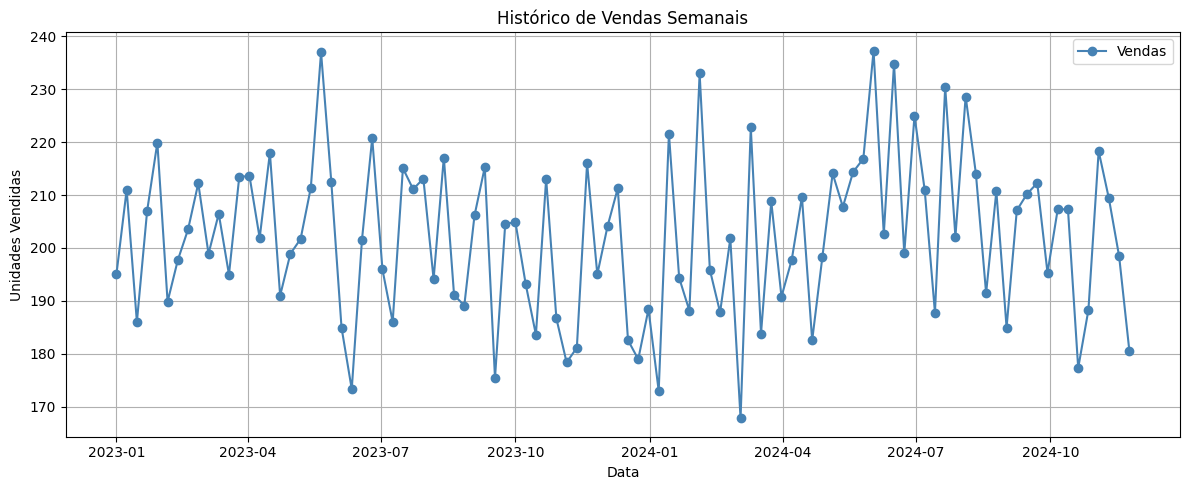

In [ ]:
# Plotando o histórico de vendas Semanais
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Vendas"], marker='o', linestyle='-', color='steelblue', label='Vendas')
plt.title("Histórico de Vendas Semanais")
plt.xlabel("Data")
plt.ylabel("Unidades Vendidas")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Tratando os dados para o formato mensal e calculando a média de vendas por mês
df = df.reset_index()
df["Mes"] = df["Data"].dt.strftime("%b")  # ex: Jan, Feb, Mar
df["Mes_Num"] = df["Data"].dt.month
media_por_mes = df.groupby("Mes_Num")["Vendas"].mean().reset_index()
media_por_mes["Mes"] = media_por_mes["Mes_Num"].apply(lambda x: datetime(2023, x, 1).strftime("%b"))
df = df.sort_values("Mes_Num")
media_por_mes = media_por_mes.sort_values("Mes_Num")

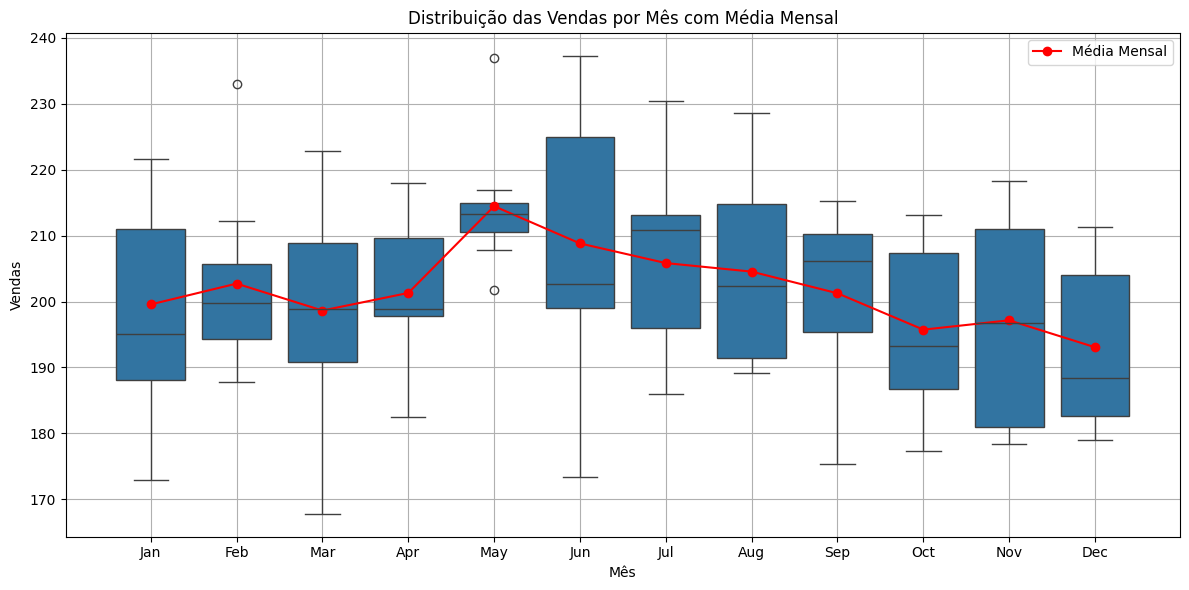

In [ ]:
# Plotar boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Mes", y="Vendas", data=df, order=media_por_mes["Mes"])

# Plotar linha com média mensal
plt.plot(media_por_mes["Mes"], media_por_mes["Vendas"], color='red', marker='o', label="Média Mensal")

plt.title("Distribuição das Vendas por Mês com Média Mensal")
plt.xlabel("Mês")
plt.ylabel("Vendas")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
df["Vendas"].describe()

count    100.000000
mean     202.161931
std       15.232033
min      167.787301
25%      190.550103
50%      202.354953
75%      212.663343
max      237.289484
Name: Vendas, dtype: float64